In [1]:
%load_ext autoreload

%autoreload 2


In [1]:
import fiona
from geopy.distance import geodesic
from pyproj import Proj, transform
import pandas as pd
import numpy as np

data = fiona.open("../webapp/backend/backend/data/parcels/ParcelsAnokaPoints.shp")
# data[27531]["properties"]

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


Data has incorrect longitude latitude.
They are provided as the projects for the current crs of EPSG:26915 rather than the actual longitude latitude.
These need to be correct before they can be used for comparison.

In [11]:
import pandas as pd
d = pd.DataFrame(taables.records)

In [7]:
from geotools.path_calc import weighted_address_search
lat, lng = [45.147762, -93.134160]
address_data = weighted_address_search(lng, lat, 5000.)

[0. 0. 1. ... 1. 0. 0.]


In [11]:
address_data["USECLASS"].unique().tolist()

[None]

TypeError: size() takes 1 positional argument but 2 were given

In [24]:
address_data.groupby("YEAR_BUILT").size()


YEAR_BUILT
0       1416
1882       1
1886       2
1890       2
1892       1
        ... 
2016     166
2017     211
2018     187
2019      45
2020       2
Length: 116, dtype: int64

In [61]:
ahousing_types = ['AGRICULTURAL', 'RESIDENTIAL SINGLE FAMILY',
       'COMMERCIAL / GOLF COURSE', 'TAX FORFEIT', 'RESIDENTIAL DUPLEXES',
       'MANUFACTURED HOME PARK', 'APARTMENTS / COOP', 'CONDOMINIUMS',
       'SEASONAL RECREATIONAL', 'UTILITY PROPERTY', 'INDUSTRIAL',
       'RAILROAD', 'SERVICE STATION']

In [66]:
from functools import reduce
# reduceaddress_data["USECLASS1"].unique()
use_classes = list(reduce(lambda a, b: a + b, [address_data[f"USECLASS{i}"].unique().tolist() for i in range(1,5)]))
set(use_classes)

{'AGRICULTURAL',
 'APARTMENTS / COOP',
 'COMMERCIAL / GOLF COURSE',
 'CONDOMINIUMS',
 'DOUBLE BUNGALOWS',
 'INDUSTRIAL',
 'MANUFACTURED HOME PARK',
 None,
 'RESIDENTIAL DUPLEXES',
 'RESIDENTIAL SINGLE FAMILY',
 'SEASONAL RECREATIONAL',
 'TAX FORFEIT',
 'UTILITY PROPERTY'}

In [60]:
address_data.loc[address_data["USECLASS1"].str.contains("APART")]

,COUNTY_PIN,STATE_PIN,ANUMBERPRE,ANUMBER,ANUMBERSUF,ST_PRE_MOD,ST_PRE_DIR,ST_PRE_TYP,ST_PRE_SEP,ST_NAME,...,SECTION,TOWNSHIP,RANGE,RANGE_DIR,PRIN_MER,PIN,VIEWID,LONGITUDE,LATITUDE,DISTANCE
1156,353123140014,27003-353123140014,None,8996,None,None,None,None,None,Jackson,...,35,31,23,0,0,003-353123140014,31043,-93.165,45.1349,2815.493304
1171,353123130079,27003-353123130079,None,8941,None,None,None,None,None,Syndicate,...,35,31,23,0,0,003-353123130079,31016,-93.170,45.1340,3207.112695
1191,353123130059,27003-353123130059,None,8951,None,None,None,None,None,Duwayne,...,35,31,23,0,0,003-353123130059,26082,-93.169,45.1349,3090.672365
1192,353123130058,27003-353123130058,None,8953,None,None,None,None,None,Duwayne,...,35,31,23,0,0,003-353123130058,31101,-93.169,45.1347,3101.018980
1193,353123130057,27003-353123130057,None,8956,None,None,None,None,None,Griggs,...,35,31,23,0,0,003-353123130057,26364,-93.169,45.1345,3111.489969
1194,353123130056,27003-353123130056,None,8955,None,None,None,None,None,Duwayne,...,35,31,23,0,0,003-353123130056,26084,-93.169,45.1345,3111.489969
1211,353123130031,27003-353123130031,None,0,None,None,None,None,None,None,...,35,31,23,0,0,003-353123130031,31111,-93.170,45.1345,3180.977435
1213,353123130029,27003-353123130029,None,8963,None,None,None,None,None,Syndicate,...,35,31,23,0,0,003-353123130029,31030,-93.171,45.1346,3245.856903
1214,353123130027,27003-353123130027,None,3940,None,None,None,None,None,Restwood,...,35,31,23,0,0,003-353123130027,36346,-93.170,45.1349,3160.617064
1252,353123120015,27003-353123120015,None,3811,None,None,None,None,None,Restwood,...,35,31,23,0,0,003-353123120015,31082,-93.170,45.1355,3131.011800


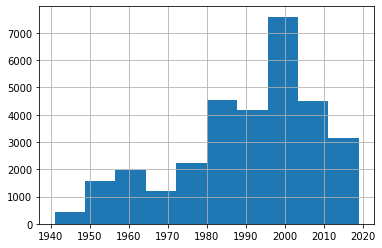

In [34]:
address_data.loc[address_data["YEAR_BUILT"] > 1940]["YEAR_BUILT"].hist()